In [1]:
import torch
import torchvision as torchv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import Tensor
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np



c:\Users\47472\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0].parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

import lossFunctions

CROSS ENTROPY LOSS

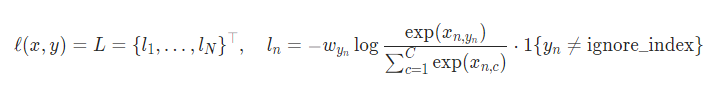

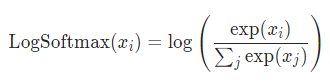

In [3]:
def zeroOneLoss(outputs, labels):
    return [1 if x[y] > 0 else 0 for x,y in zip(outputs ,labels)]

In [4]:
xList = torch.randn(3, 2, requires_grad=True)
yList = torch.empty(3, dtype=torch.long).random_(2)

print(xList)
print(yList)
print([1 if x[y] > 0 else 0 for x,y in zip(xList ,yList)])
print(yList == 1)

tensor([[ 0.1723, -1.8791],
        [ 0.4271, -1.0715],
        [ 2.8376, -0.1976]], requires_grad=True)
tensor([1, 0, 0])
[0, 1, 1]
tensor([ True, False, False])


In [5]:
y_true = torch.randn(10, 2, requires_grad=True)
print(y_true)
print(torch.max(y_true, dim=1)[1])

tensor([[ 0.2071, -0.2736],
        [-0.0687,  0.0527],
        [ 1.2146, -0.2193],
        [ 0.2580,  0.1848],
        [ 0.6014,  1.4177],
        [-1.0332, -0.3445],
        [-0.4409,  0.8614],
        [-0.5636,  1.0257],
        [-1.1858, -1.2358],
        [-1.4116,  1.6404]], requires_grad=True)
tensor([0, 1, 0, 0, 1, 1, 1, 1, 0, 1])


In [6]:
classes = 2
numberOfInput = 10

input = torch.randn(numberOfInput, classes, requires_grad=True)
target = torch.empty(numberOfInput, dtype=torch.long).random_(classes)


print('input: ', input)
print('target: ', target)

print("==========")
cross_entropy_loss = nn.CrossEntropyLoss()
customloss = lossFunctions.CustomLoss(5)
test = nn.MultiMarginLoss()

output = cross_entropy_loss(input, target)
output2 = customloss(input, target)
output4 = test(input, target)

output.backward()
output2.backward()
output4.backward()


print('output standard: ', output)
print('output customloss: ', output2)
print('output multimargin: ', output4)

input:  tensor([[-0.9261,  0.2939],
        [ 0.7887,  0.7070],
        [ 1.6132,  1.2852],
        [ 0.4851, -0.9266],
        [-0.9960,  0.1320],
        [ 0.1216,  1.1277],
        [ 0.2323,  0.4228],
        [-0.5548,  1.1340],
        [-0.5210,  0.2292],
        [-0.1283, -0.8258]], requires_grad=True)
target:  tensor([1, 1, 0, 1, 0, 1, 1, 1, 1, 0])
output standard:  tensor(0.6449, grad_fn=<NllLossBackward0>)
output customloss:  tensor(0.7411, grad_fn=<DivBackward0>)
output multimargin:  tensor(0.3828, grad_fn=<MultiMarginLossBackward0>)


In [7]:
input = torch.FloatTensor([[100.0, 0.0]])
target = torch.LongTensor([0])
input.requires_grad_()
exp = torch.exp(input)
print("=======", torch.sum(exp, 1, keepdim=True))
print(exp/torch.sum(exp, 1, keepdim=True))
print("=======",torch.log(exp/torch.sum(exp, 1, keepdim=True)))

print('input: ', input)
print('target: ', target)
output = customloss(input, target)
output.backward()
print('output standard: ', output)

======= tensor([[inf]], grad_fn=<SumBackward1>)
tensor([[nan, 0.]], grad_fn=<DivBackward0>)
======= tensor([[nan, -inf]], grad_fn=<LogBackward0>)
input:  tensor([[100.,   0.]], requires_grad=True)
target:  tensor([0])
output standard:  tensor(0.0780, grad_fn=<DivBackward0>)


In [8]:
x = torch.linspace(1,10,10)
y = torch.zeros(10)
print(x, "===", y)
print(torch.stack((x,y),1))

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]) === tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([[ 1.,  0.],
        [ 2.,  0.],
        [ 3.,  0.],
        [ 4.,  0.],
        [ 5.,  0.],
        [ 6.,  0.],
        [ 7.,  0.],
        [ 8.,  0.],
        [ 9.,  0.],
        [10.,  0.]])


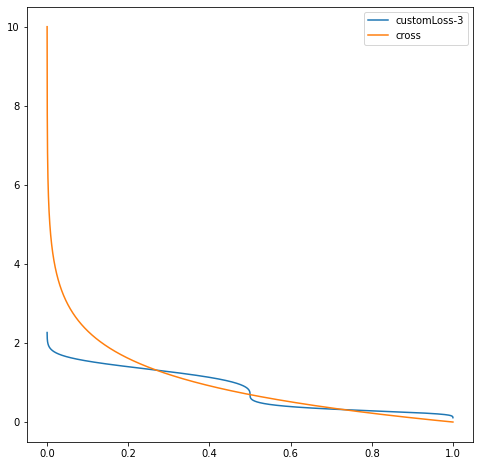

In [9]:
loss1 = lossFunctions.CustomLoss(3)
loss2 = nn.CrossEntropyLoss()
m = nn.Sigmoid()

result1 = []
result2 = []
rnge =  np.arange(-10,10,0.001)
for i in rnge:
    result1.append(loss1(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
    result2.append(loss2(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
plt.figure(figsize=(8,8))
plt.plot(m(torch.tensor(rnge)), result1, label="customLoss-3")
plt.plot(m(torch.tensor(rnge)), result2, label="cross")
# print(list(m((torch.tensor(rnge)))))
plt.legend()
plt.show()

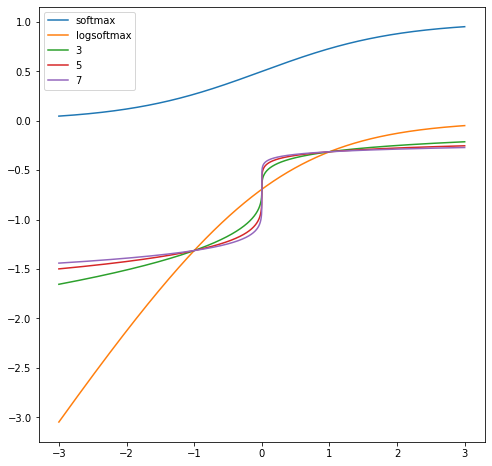

In [12]:
n = nn.Softmax(dim=1)
m = nn.LogSoftmax(dim=1)
result0 = []
result1 = []
result2 = []
result3 = []
result4 = []
result5 = []
rnge =  np.arange(-3,3,0.001)
for i in rnge:
    result0.append(n(torch.FloatTensor([[i, 0]]))[0].data[0])
    result1.append(m(torch.FloatTensor([[i, 0]]))[0].data[0])
    result2.append(lossFunctions.logSoftmax(torch.FloatTensor([[i, 0]]), 3)[0].data[0])
    result3.append(lossFunctions.logSoftmax(torch.FloatTensor([[i, 0]]), 5)[0].data[0])
    result4.append(lossFunctions.logSoftmax(torch.FloatTensor([[i, 0]]), 7)[0].data[0])
    
plt.figure(figsize=(8,8))
plt.plot(rnge, result0, label="softmax")
plt.plot(rnge, result1, label="logsoftmax")
plt.plot(rnge, result2, label="3")
plt.plot(rnge, result3, label="5")
plt.plot(rnge, result4, label="7")
plt.legend()
plt.show()

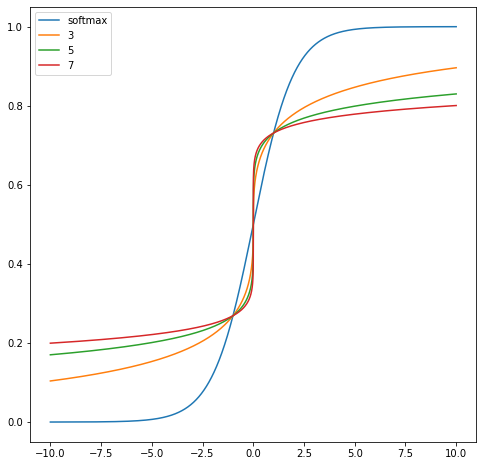

In [22]:
n = nn.Softmax(dim=1)
result0 = []
result1 = []
result2 = []
result3 = []
result4 = []
result5 = []
rnge =  np.arange(-10,10,0.001)
for i in rnge:
    result0.append(n(torch.FloatTensor([[i, 0]]))[0].data[0])
    result2.append(lossFunctions.testSoftmax(torch.FloatTensor([[i, 0]]), 3)[0].data[0])
    result3.append(lossFunctions.testSoftmax(torch.FloatTensor([[i, 0]]), 5)[0].data[0])
    result4.append(lossFunctions.testSoftmax(torch.FloatTensor([[i, 0]]), 7)[0].data[0])
    
plt.figure(figsize=(8,8))
plt.plot(rnge, result0, label="softmax")
plt.plot(rnge, result2, label="3")
plt.plot(rnge, result3, label="5")
plt.plot(rnge, result4, label="7")
plt.legend()
plt.show()